In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import sys, os, re, glob

In [3]:
energyG = np.linspace(0, 1000, 1000)
correction = np.zeros_like(energyG)

# Fill according to the correction
correction[energyG < 5] = 1.0 + 0.075 *energyG[energyG < 5] + 0.025*energyG[energyG < 5]*energyG[energyG < 5]
correction[(energyG >= 5) & (energyG < 20)] = 1.016 + 0.2042*energyG[(energyG >= 5) & (energyG < 20)] - 0.00148*energyG[(energyG >= 5) & (energyG < 20)]*energyG[(energyG >= 5) & (energyG < 20)]
correction[(energyG >= 20) & (energyG < 60)] = 1.145 + 0.248617*energyG[(energyG >= 20) & (energyG < 60)]  - 0.00462*energyG[(energyG >= 20) & (energyG < 60)] *energyG[(energyG >= 20) & (energyG < 60)]  + 0.0000298333*energyG[(energyG >= 20) & (energyG < 60)] *energyG[(energyG >= 20) & (energyG < 60)] *energyG[(energyG >= 20) & (energyG < 60)] 
correction[(energyG >= 60) & (energyG < 150)] = 1.42824 + 0.128068*energyG[(energyG >= 60) & (energyG < 150)] - 0.00108813*energyG[(energyG >= 60) & (energyG < 150)]*energyG[(energyG >= 60) & (energyG < 150)] + 3.14325e-6*energyG[(energyG >= 60) & (energyG < 150)]*energyG[(energyG >= 60) & (energyG < 150)]*energyG[(energyG >= 60) & (energyG < 150)]
correction[(energyG >= 150) & (energyG < 400)] = 6.408 + 0.00170583*energyG[(energyG >= 150) & (energyG < 400)] + 6.675e-6*energyG[(energyG >= 150) & (energyG < 400)]*energyG[(energyG >= 150) & (energyG < 400)] - 1.48333e-8*energyG[(energyG >= 150) & (energyG < 400)]*energyG[(energyG >= 150) & (energyG < 400)]*energyG[(energyG >= 150) & (energyG < 400)]
correction[energyG >= 400] = 5.67375 + 0.00751086*energyG[energyG >= 400] - 0.0000114588*energyG[energyG >= 400]*energyG[energyG >= 400] + 5.69229e-9*energyG[energyG >= 400]*energyG[energyG >= 400]*energyG[energyG >= 400]

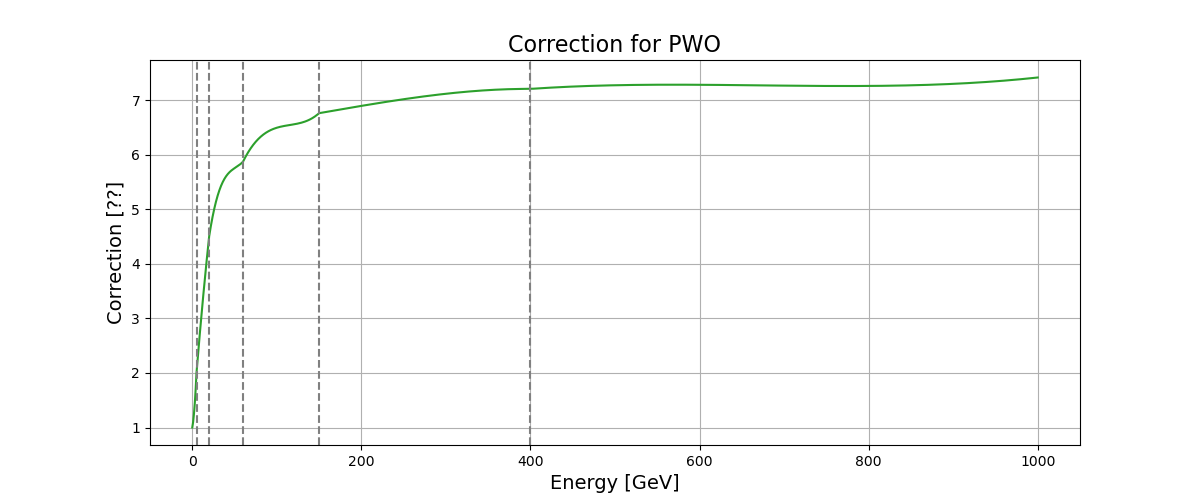

In [5]:
%matplotlib widget

fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(energyG, correction, c = "tab:green")

ax.set_title("Correction for PWO", fontsize = 16)
ax.set_xlabel("Energy [GeV]", fontsize = 14)
ax.set_ylabel("Correction [??]", fontsize = 14)
ax.grid()
# ax.legend(fontsize = 14)

ax.axvline(x = 5, ls = "--", c = "grey")
ax.axvline(x = 20, ls = "--", c = "grey")
ax.axvline(x = 60, ls = "--", c = "grey")
ax.axvline(x = 150, ls = "--", c = "grey")
ax.axvline(x = 400, ls = "--", c = "grey")

plt.show()